# Explainable AI Assignment
This is a template for Assignment 2 of Machine Learning Bootcamp. Please make sure you perform all tasks within the sections created. This ensures that your assignment is evaluated correctly. 

If you want to do something extra and show us your creativity, we have also created a space for it at the end!

# Task 1

## Import Libraries

In [1]:
import numpy as np
import pandas as pd
from statistics import mean 

import seaborn as sns
import matplotlib.pyplot as plt

from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score, r2_score, mean_squared_error
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, GridSearchCV

## Load the data
Display the first 5 rows of the data after loading.

In [2]:
heart_data =  pd.read_csv("https://raw.githubusercontent.com/dphi-official/Datasets/master/Heart_Disease/Training_set_heart.csv" )

## Perform Basic Exploratory Data Analysis

In [3]:
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212 entries, 0 to 211
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       212 non-null    int64  
 1   sex       212 non-null    int64  
 2   cp        212 non-null    int64  
 3   trestbps  212 non-null    int64  
 4   chol      212 non-null    int64  
 5   fbs       212 non-null    int64  
 6   restecg   212 non-null    int64  
 7   thalach   212 non-null    int64  
 8   exang     212 non-null    int64  
 9   oldpeak   212 non-null    float64
 10  slope     212 non-null    int64  
 11  ca        212 non-null    int64  
 12  thal      212 non-null    int64  
 13  target    212 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 23.3 KB


In [4]:
heart_data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000
mean,54.561321,0.688679,0.915094,132.127358,247.830189,0.165094,0.537736,148.995283,0.330189,1.008491,1.448113,0.783019,2.320755,0.542453
std,9.493376,0.464130,1.008193,17.440700,53.199877,0.372144,0.527437,23.332645,0.471394,1.141681,0.601850,1.066551,0.646495,0.499374
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.000000,0.000000,0.000000,120.000000,211.750000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,57.000000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,151.500000,0.000000,0.650000,2.000000,0.000000,2.000000,1.000000
75%,61.250000,1.000000,2.000000,140.000000,277.000000,0.000000,1.000000,165.250000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,192.000000,564.000000,1.000000,2.000000,202.000000,1.000000,5.600000,2.000000,4.000000,3.000000,1.000000


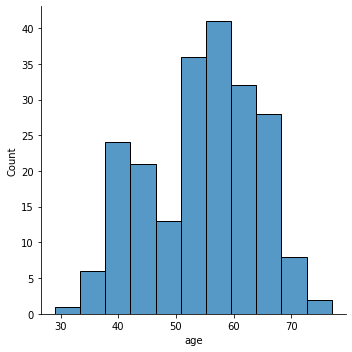

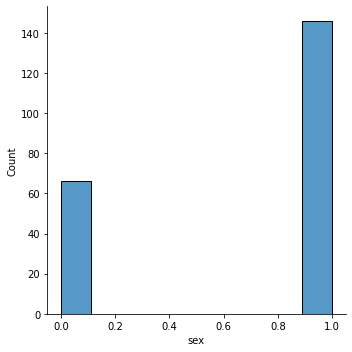

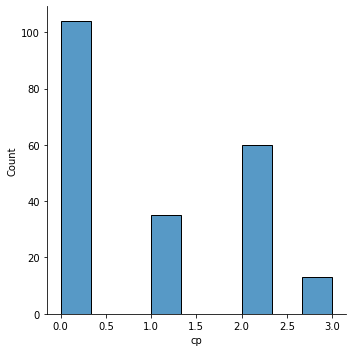

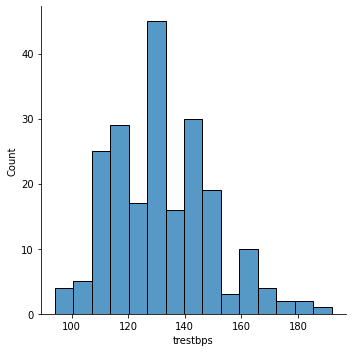

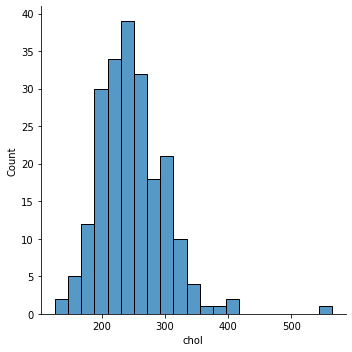

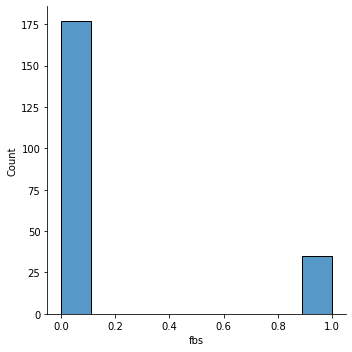

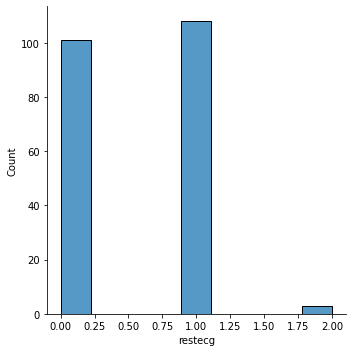

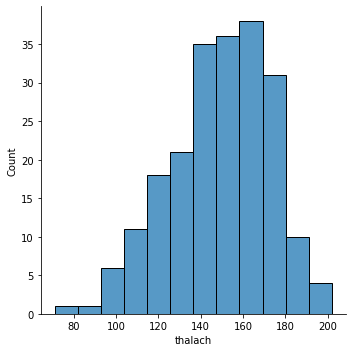

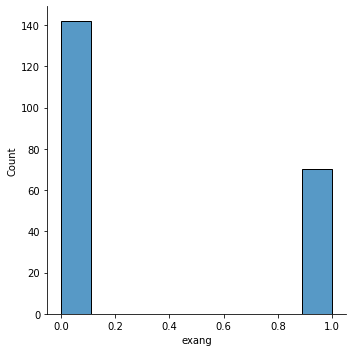

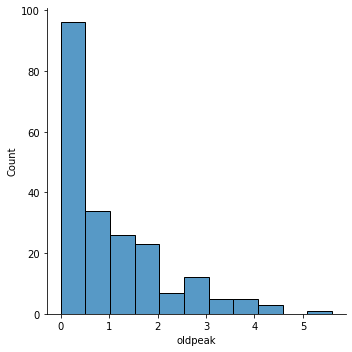

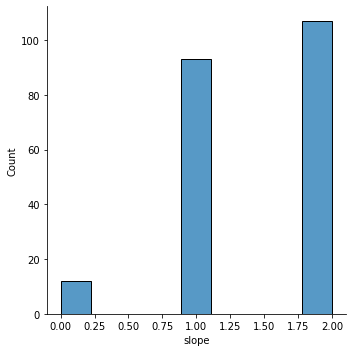

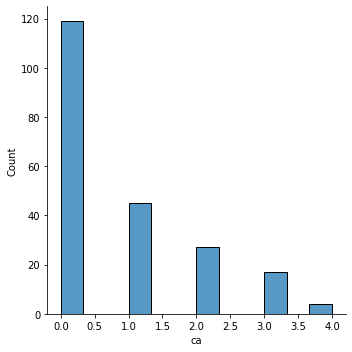

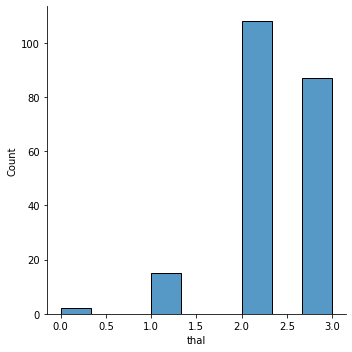

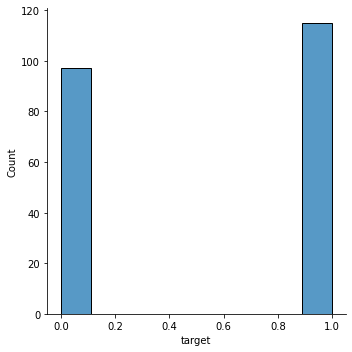

In [7]:
#plot data to make sure what are categorical and numerical features
for col in heart_data.columns:
  sns.displot(heart_data[col])

## Separate the Input and Target Features of the data

In [8]:
X = heart_data.drop(columns = 'target')
y = heart_data.target

## Split the data into Train and Test Sets
The train to test ratio should be 80:20 and the random_state should be 0.


In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

## Scale your data if required

In [ ]:
#since scaler is not required, no neet to run this code
#from sklearn.preprocessing import StandardScaler
#sc = StandardScaler()
#sc.fit_transform

# Task 2

## Build a Logistic Regression Model on train set

In [10]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

## Evaluate the model using F1 Score

In [11]:
from sklearn.metrics import f1_score
print('{:s} : {:.3f}'.format('f1 score of lr on trainset', f1_score(y_train, lr.predict(X_train))))

f1 score of lr on trainset : 0.863


In [13]:
from sklearn.metrics import f1_score
print('{:s} : {:.3f}'.format('f1 score of lr on testset', f1_score(y_test, lr.predict(X_test))))

f1 score of lr on testset : 0.844


# Task 3

##  Use a SHAP Explainer to derive SHAP Values for the logistic regression model.

In [14]:
!pip install shap

     |████████████████████████████████| 327kB 4.2MB/s 
  Created wheel for shap: filename=shap-0.37.0-cp36-cp36m-linux_x86_64.whl size=463907 sha256=263f3618a1427a2c75b3e63389526bc5955272e1efbc8e0de09806c0b5c53bcd
  Stored in directory: /root/.cache/pip/wheels/df/ad/b0/aa7815ec68850d66551ef618095eccb962c8f6022f1d3dd989
Successfully built shap


In [15]:
import shap

In [22]:
#define explainer and shap values
#explainer uses data from model and train data
explainer = shap.LinearExplainer(lr, X_train)
#shap_values use inputs from explainer and test data
shap_values = explainer.shap_values(X_test)

The feature_perturbation option is now deprecated in favor of using the appropriate masker (maskers.Independent, or maskers.Impute)


In [23]:
explainer.expected_value

0.24549658384611509

In [24]:
#create dataframe with columns from test data
pd.DataFrame(shap_values, columns=X_test.columns).head(3)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,-0.013388,-0.227962,1.087871,-1.173958,0.097287,-0.129153,0.446136,0.219330,0.324824,0.182894,0.399910,0.398954,-0.602583
1,-0.395906,-0.227962,-0.890076,0.610435,0.169585,0.022792,-0.759637,-0.999168,-0.795258,-0.671752,-0.384228,0.398954,-0.602583
2,0.145994,0.763176,0.098897,0.034824,0.013692,0.022792,-0.759637,0.523954,0.324824,0.467777,-0.384228,-0.112525,0.211718


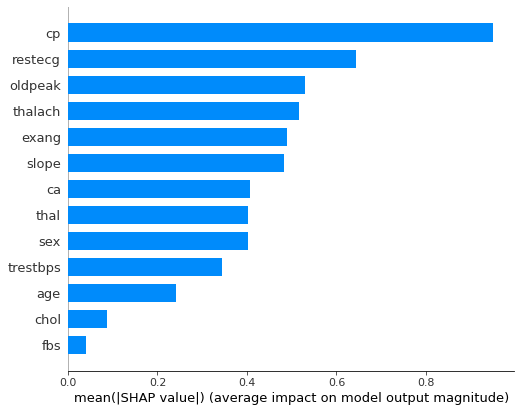

In [26]:
#Show summary plot
#Here, we can analyze which features correlates more on test data
shap.summary_plot(shap_values, X_test, plot_type='bar')

## Write your inferences from the generated plot.


From the summary plot, we can conclude that the 3 top features that influences prediction of test data consecutively are:

1. cp (chest pain type)
2. restecg (Resting electrocardiographic results
3. oldpeak (ST depression induced by exercise relative to rest)

# Task 4

## Plot a SHAP force plot for the first row of test data.

In [27]:
#visualize 1th instance relations 
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[0, :], X_test.iloc[0,:])

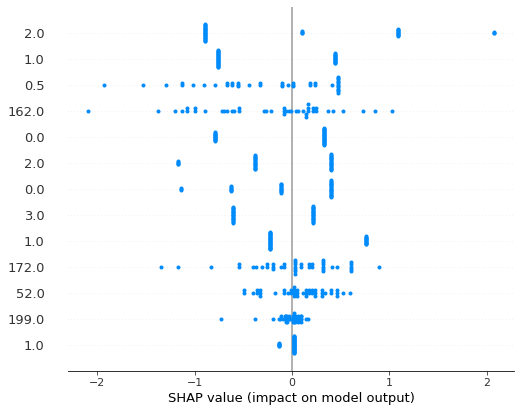

In [45]:
shap.summary_plot(shap_values, X_test.iloc[0,:], plot_type='dot')

In [31]:
for col in heart_data.columns:
  print('{}{:s} : {:.3f}'.format('mean ',col, heart_data[col].mean()))

mean age : 54.561
mean sex : 0.689
mean cp : 0.915
mean trestbps : 132.127
mean chol : 247.830
mean fbs : 0.165
mean restecg : 0.538
mean thalach : 148.995
mean exang : 0.330
mean oldpeak : 1.008
mean slope : 1.448
mean ca : 0.783
mean thal : 2.321
mean target : 0.542


## Write your inferences from the generated plot.

For the first instance, features influence the prediction are:
1. trestbps
- a higher resting blood pressure than average : 172 vs 132.127
2. cp
- chest pain type, which is type 2
3. thal
- reversible defect found

# Task 5

## Plot a SHAP force plot for all the rows of the data

In [39]:
#visualize all instances relations 
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values, X_test)

## Write your inferences from the generated plot.

The right half of the test data are having more probablity of having heart attack than the left half, as shown by the red curve which show higher expected value

# Task 6

## Plot a SHAP summary plot using all the features in the data

In [46]:
#define explainer and shap values
#explainer uses data from model and train data
explainer_all = shap.LinearExplainer(lr, X)
#shap_values use inputs from explainer and test data
shap_values_all = explainer_all.shap_values(X)

The feature_perturbation option is now deprecated in favor of using the appropriate masker (maskers.Independent, or maskers.Impute)


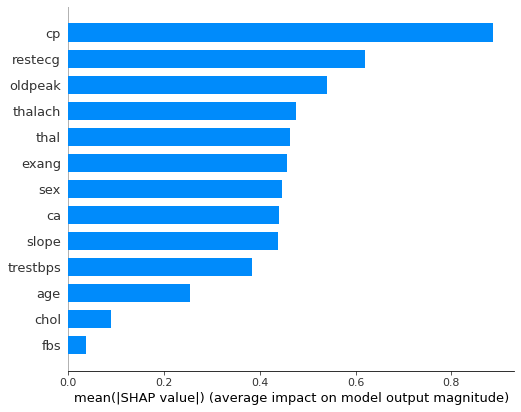

In [48]:
shap.summary_plot(shap_values_all, X, plot_type='bar')

## Write your inferences from the generated plot.

From the summary plot, we can conclude that the 3 top features that influences prediction of all data consecutively are:

1. cp (chest pain type)
2. restecg (Resting electrocardiographic results
3. oldpeak (ST depression induced by exercise relative to rest)

# Task 7

## Plot a dependence plot to show the effect of ‘chol’ across the whole dataset.

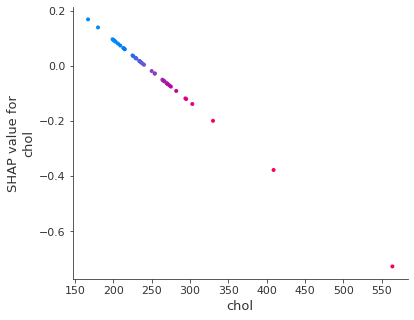

In [51]:
shap.dependence_plot(ind='chol', interaction_index='chol',
                     shap_values=shap_values, 
                     features=X_test,  
                     display_features=X_test)

## Write your inferences from the generated plot.

the higher chol value, the higher probability of a person to have a heart attack. This argument does make sense since intuitively, cholesterol correlated with the heart attack.

# Task 8 (Optional)

## Do anything and everything with SHAP
This is the section to explore what more you can do with SHAP. Create some meaningful visualisations and write down what you can infer from them. 

Who knows, this section might carry some bonus points.

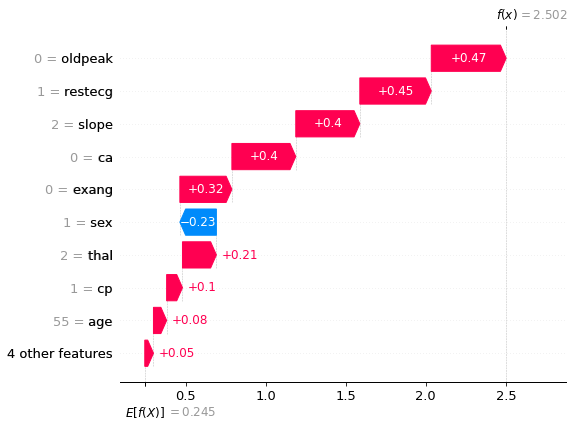

In [57]:
shap_wf = explainer(X_train)
shap.plots.waterfall(shap_wf[0])

We plot a waterfall graphic for the first instance of training data. Interestingly, amoong any other factor, what might reduce probablity of having a heart attack is **sex**! Male are less prone to have a heart attack here.

That is the end of this assignment. We hope you learnt a lot along the way. 
Make sure you complete the other 2 parts (leaderboard submission and quiz) as well.

Now, rename this file as **firstname_lastname_XAI.ipynb**, Download it and submit it on the platform. 